## Projektna naloga

Podatkovno rudarjenje, naloga, `DATUM`  
**`Denis Popović`**

### Podatki

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

description = pd.read_csv("Data/steam_description_data.csv")
media = pd.read_csv("Data/steam_media_data.csv")
requirements = pd.read_csv("Data/steam_requirements_data.csv")
support = pd.read_csv("Data/steam_support_info.csv")
steam = pd.read_csv("Data/steam.csv")
tag = pd.read_csv("Data/steamspy_tag_data.csv")

## Najbolj popularni developerji ali podobne zanimivosti

`Najbolj popularni developerji so tisti, ki imajo fanbase največji (število prodanih kopij vseh njihovih iger). Tuki ne potrebujemo pregledovati če imajo popularne igre ali ne, saj se v gaming industriji veliko krat zgodi to, da developerji imajo tako dobre kot tudi slabe igre. Tuki je važno da jih ljudi poznajo oz. da posedujejo njihovo igro. Kar je lahko tuki problem, je ta da eni developerji imajo več iger kot drugi developerji in se lahko zgodi to, da npr.: ena oseba ima več iger od istega developerja in bomo isto osebo šteli večkrat. Če pa na problem pogledamo drugače nas to ne moti, saj developerjem, ki na vsakih par let izdajajo igre so bolj popularni in se bolj zapomnijo ljudem.`

In [150]:
import re

def getOwners(s):
    t = s.split("-")
    lowerBound = int(t[0])
    upperBound = int(t[1])
    return (lowerBound+upperBound)/2

def getYear(s):
    return int(s.split("-")[0])
    
def getName(s):
    return re.sub("\s.Linux.|\s.Mac.","",s)

In [151]:
def getDevelopers(year,top):
    devels = dict()
    for release_date, devel, owners, price in steam[["release_date","developer","owners","price"]].values:
        for n in devel.split(";"):
            name = getName(n)
            devels.setdefault(name,[0,0,False,0,0])
            devels[name][0] += getOwners(owners)
            devels[name][1] += 1
            if(float(price) == 0.0): devels[name][3] += 1
            else: devels[name][4] += 1
            if(year <= getYear(release_date)): devels[name][2]= True
    
    devels = dict(sorted(devels.items(), key=lambda k: k[1][0], reverse=True))
    devels_top = dict()
    i = 0
    print("Top %d najbolj popularnih ravzijalcev\n"%top)
    for name, value in devels.items():
        if(i >= top): break
        if(value[2]):
            print(name)
            devels_top[name] = value
        i += 1 
    return devels_top

In [152]:
devels = getDevelopers(2013,15)

Top 15 najbolj popularnih ravzijalcev

Valve
Feral Interactive
Hidden Path Entertainment
PUBG Corporation
Aspyr
Digital Extremes
Bethesda Game Studios
Smartly Dressed Games
Firaxis Games
Gearbox Software
Ubisoft Montreal
Relic Entertainment
Facepunch Studios
Avalanche Studios
CREATIVE ASSEMBLY


`Z naslednjimi vizualizacijami bmo pogledali zakaj so ti developerji popularni`

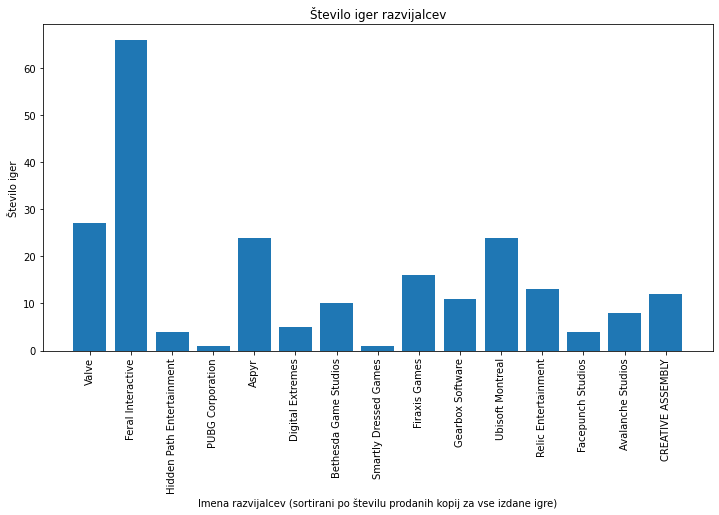

In [153]:
games = []
for v in devels.values():
    games.append(v[1])

plt.figure(figsize=(12,6))
plt.bar(devels.keys(),games)
plt.xticks(range(len(devels.keys())), devels.keys(), rotation=90)
plt.xlabel("Imena razvijalcev (sortirani po številu prodanih kopij za vse izdane igre)")
plt.ylabel("Število iger")
plt.title("Število iger razvijalcev")
plt.show()

`Že iz prvega grafa vidimo kako nekateri podatki iztopajo (Feral Interactive, PUBG Corporation, Smartly Dressed Games)`

In [154]:
develsByNumGames = dict(sorted(devels.items(), key=lambda k: k[1][1], reverse=True))
free = []
paid = []
for v in develsByNumGames.values():
    free.append(v[3])
    paid.append(v[4])


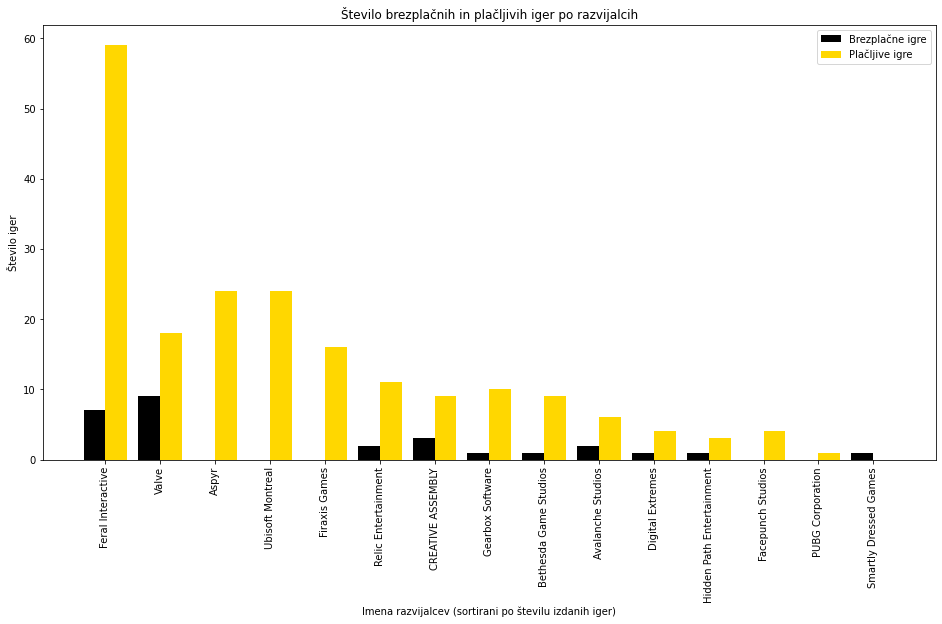

In [155]:
plt.figure(figsize=(16,8),facecolor='w')
plt.bar(np.arange(len(develsByNumGames.keys()))-0.2, free, width=0.4, color="black", align="center", label="Brezplačne igre")
plt.bar(np.arange(len(develsByNumGames.keys()))+0.2, paid, width=0.4, color="gold", align="center", label="Plačljive igre")
plt.xticks(range(len(develsByNumGames.keys())), develsByNumGames.keys(), rotation=90)
plt.legend()
plt.xlabel("Imena razvijalcev (sortirani po številu izdanih iger)")
plt.ylabel("Število iger")
plt.title("Število brezplačnih in plačljivih iger po razvijalcih")
plt.show()

Text(0.5, 1.0, 'Popularnost razvijalcev')

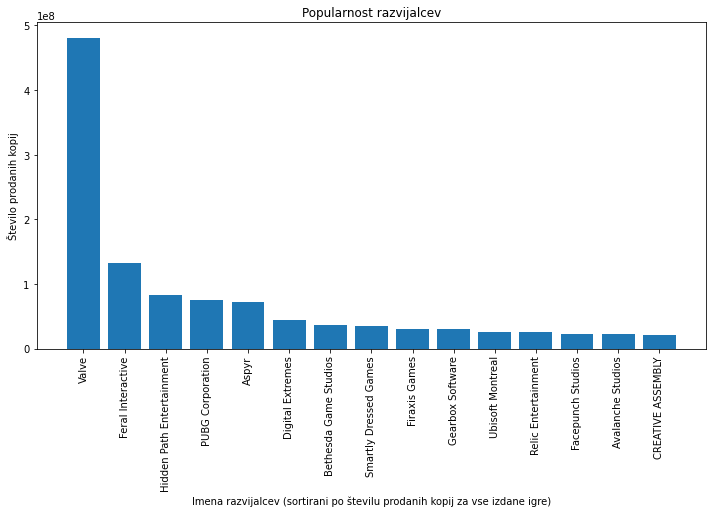

In [156]:
owners = []
games = []
for v in devels.values():
    owners.append(v[0])
    games.append(v[1])

plt.figure(figsize=(12,6),facecolor="w")
plt.bar(devels.keys(),owners)
plt.xticks(range(len(devels.keys())), devels.keys(), rotation=90)
plt.xlabel("Imena razvijalcev (sortirani po številu prodanih kopij za vse izdane igre)")
plt.ylabel("Število prodanih kopij")
plt.title("Popularnost razvijalcev")

`Iz zgornjih grafov lahko presodimo, da populacija developerja ni odvisna od števila izdanih iger in če je igra brezplačna ali plačilna. Npr.: PUBG Corporation in Smartly Dressed Games imata izdano samo po eno igro,pri tem, da je eno potrebno kupiti, druga pa brezplačna in sta še vedno v top 10 developerjev. Feral Interactive pa v številu iger zelo odstopa od drugih developerjev zaradi tega, ker sodelujejo z drugi developerji in spremenijo platformo npr.:(Linux, MacOs, iOS, Android) igre, ki so izdane s strani drugega developerja in v tem je smisel za tako veliko število "izdanih" iger.`

`Glede na populacijo je developer Valve v ogromni prednosti pred drugimi developerji. Namreč podatkovna baza pripada Steam spletni trgovini, kar pa pripada developerju Valve. Obstajajo tudi druge spletne trgovine, ampak niso tako velike kot Steam, se pravi tudi če je Steam v lastništvu Valve nam ta podatek ne uniči dejstva zakaj je Valve tako uspešen developer.`

In [157]:
steam

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


Spodnja funkcija izbriše in doda potrebne atribute v tabelo steam

In [260]:
#----------------------------POPRAVLJANE TEBELE STEAM----------------------------
def buildSteamDataframe(originalDataFrame):
    mySteam = originalDataFrame.copy()
    #Rating -> pistive r / all r
    mySteam["rating"] = mySteam["positive_ratings"]/(mySteam["positive_ratings"]+mySteam["negative_ratings"])
    #Razdelitev leta na leto in mesec (dan zbrišemo)
    mySteam[["release_year","release_month","release_day"]] = mySteam.release_date.str.split("-",expand=True,)
    #owners -> (min own. + max own) /2
    mySteam["owners"] = [ pd.to_numeric((pd.to_numeric(row["owners"].split("-")[0]) + pd.to_numeric(row["owners"].split("-")[1]))//2)  for index, row in mySteam.iterrows()]
    #delete nepotrebne podatke
    mySteam = mySteam.drop(columns=["release_date","release_day","required_age","achievements","positive_ratings","negative_ratings","english"])
    return mySteam

In [262]:
mySteam = buildSteamDataframe(steam)

Funkcija filtrira tabelo po atributih ki vsebujejo vpisano vrednost. Vrne novo tabelo.

In [263]:
#----------------------------MATRIKA Z DOLOČENIMI VREDNOSTMI----------------------------
#atribut->atribut v tabeli; value->vrednost, ki jo vrednost mora vsebovati; OGDateFrame->originalna tabela
def getDataFrameFor(atribut, value, OGDataFrame):
    #če atribut obstaja gremo naprej
    myGroups = []
    if( atribut in list(OGDataFrame)):
        groups = OGDataFrame.groupby([atribut]).groups
        for key in groups.keys():
            if(key.find(value) >= 0):
                myGroups.append(key)
        if(len(myGroups) > 0):
            matrix = pd.concat([OGDataFrame.loc[groups[myGroups[i]],] for i in range(len(myGroups))], ignore_index=True)
            return matrix
    return null
        

In [266]:
matrika = getDataFrameFor("release_year", "2015",mySteam)
matrika

,appid,name,developer,publisher,platforms,categories,genres,steamspy_tags,average_playtime,median_playtime,owners,price,rating,release_year,release_month
0,24010,Train Simulator 2019,Dovetail Games,Dovetail Games - Trains,windows,Single-player;Steam Achievements;Full controll...,Simulation,Simulation;Trains;Singleplayer,287,385,1500000,34.99,0.616364,2015,09
1,38400,Fallout: A Post Nuclear Role Playing Game,Interplay Inc.,Bethesda Softworks,windows,Single-player;Steam Cloud,RPG,RPG;Post-apocalyptic;Classic,93,49,1500000,7.99,0.915683,2015,11
2,200150,Battle Chess: Game of Kings™,Olde Sküül;Sculptured Software,Interplay Entertainment Corp.,windows,Single-player;Multi-player;Cross-Platform Mult...,Casual;Strategy,Strategy;Chess;Casual,0,0,10000,22.99,0.460784,2015,12
3,208650,Batman™: Arkham Knight,Rocksteady Studios,Warner Bros. Interactive Entertainment,windows,Single-player;Steam Achievements;Full controll...,Action;Adventure,Batman;Action;Open World,1266,1296,1500000,15.99,0.718429,2015,06
4,208750,Apotheon,Alientrap,Alientrap,windows;mac;linux,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie;RPG,Action;Platformer;Mythology,716,716,350000,10.99,0.903187,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,429490,Resilience Wave Survival,Jimbob Games,Jimbob Games,windows,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;Casual;Indie,Action;Indie;Adventure,9,9,10000,7.19,0.631902,2015,12
2593,429950,ABO MANDO,UNDEAD,Andrés Calva;Luis Calva,windows,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie,Action;Indie;Adventure,275,294,35000,0.79,0.276923,2015,12
2594,430020,Dance of Death,eight game studio,RunServer,windows,Single-player;Steam Trading Cards,Adventure,Hidden Object;Adventure;Casual,0,0,35000,2.79,0.627660,2015,12
2595,430280,Nature Defenders,Nordic Mist Games,Nordic Mist Games,windows;mac;linux,Single-player,Casual;Indie;Strategy,Strategy;Indie;Casual,0,0,10000,3.99,0.625000,2015,12
